In [1]:
import pandas as pd


In [2]:
df=pd.read_csv('/content/Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df.isna().sum(axis=0)

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [6]:
df.fillna(df['Age'].median(), inplace=True)
df.fillna(df['Embarked'].mode()[0], inplace=True)
df.drop('Cabin', axis=1, inplace=True)

In [7]:
df.isna().sum(axis=0)

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Feature Engineering


In [8]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-2248150579.py:1: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [9]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,1


In [10]:
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,1,1


Visualisation

In [11]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

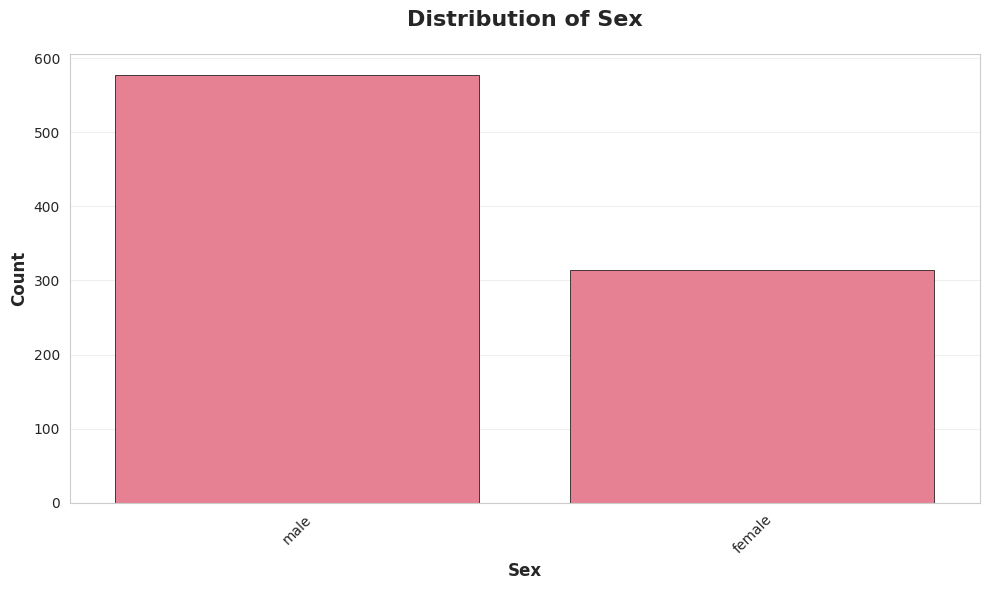

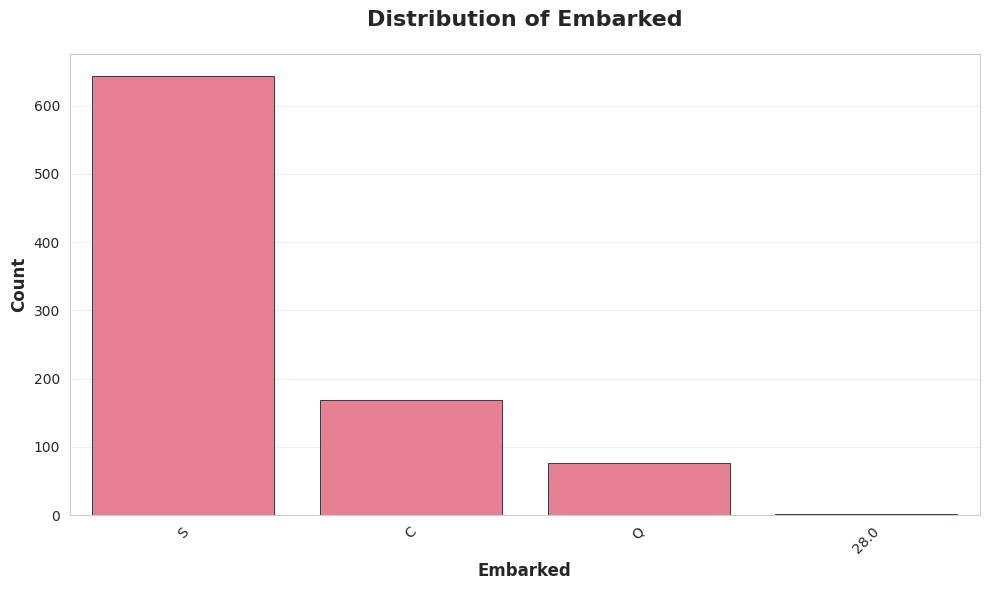

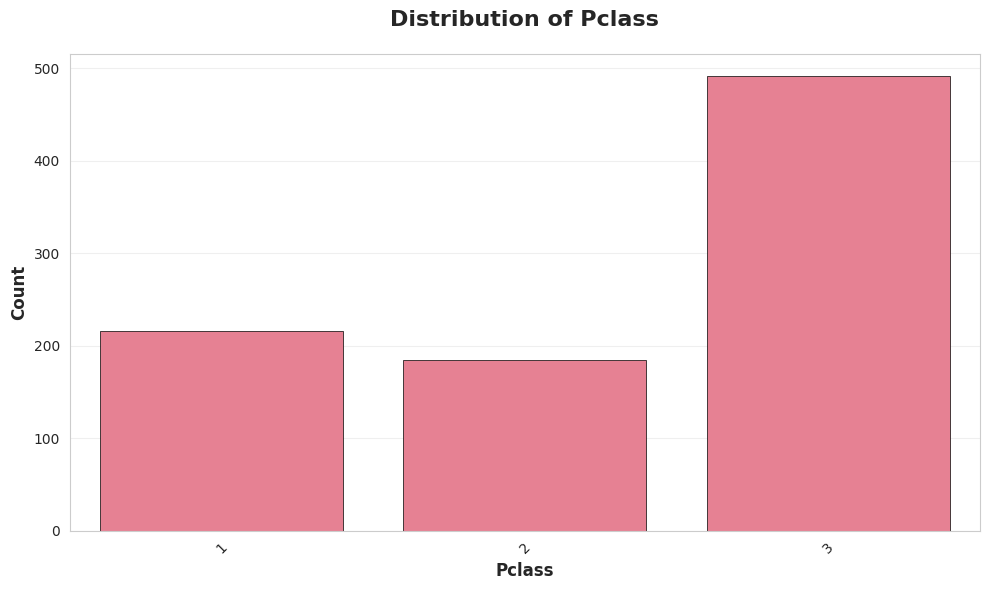

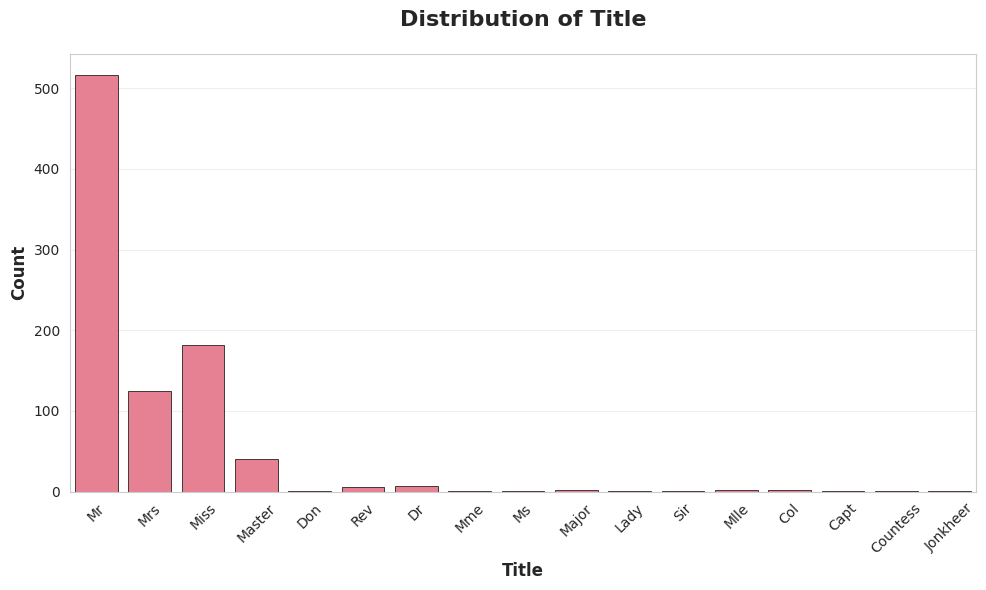

In [12]:
sns.set_style("whitegrid")
sns.set_palette("husl")
for col in ['Sex', 'Embarked', 'Pclass', 'Title']:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df, edgecolor='black', linewidth=0.5)
    plt.title(f'Distribution of {col}', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel(col, fontsize=12, fontweight='bold')
    plt.ylabel('Count', fontsize=12, fontweight='bold')
    plt.xticks(rotation=45)

    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

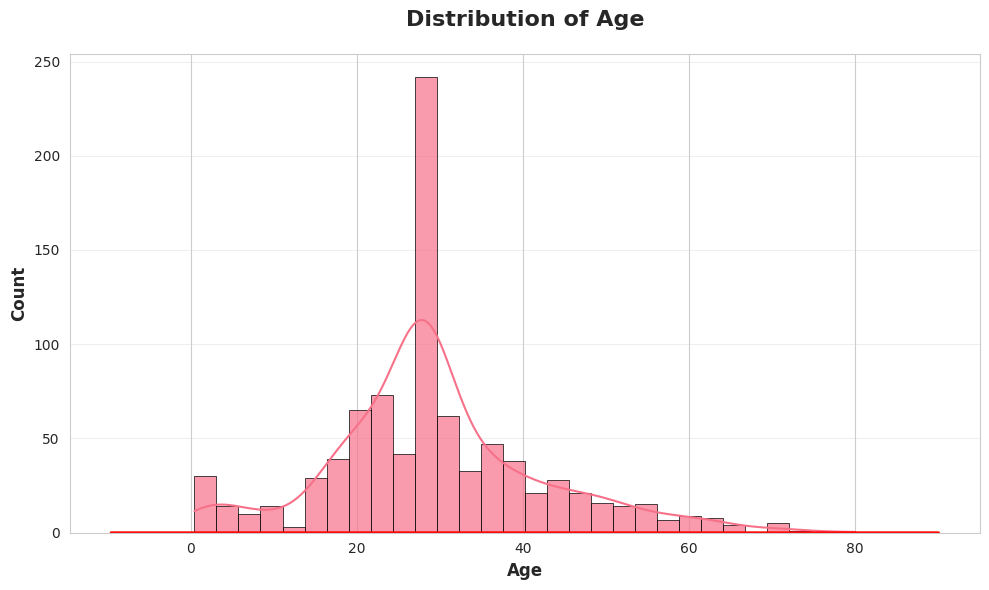

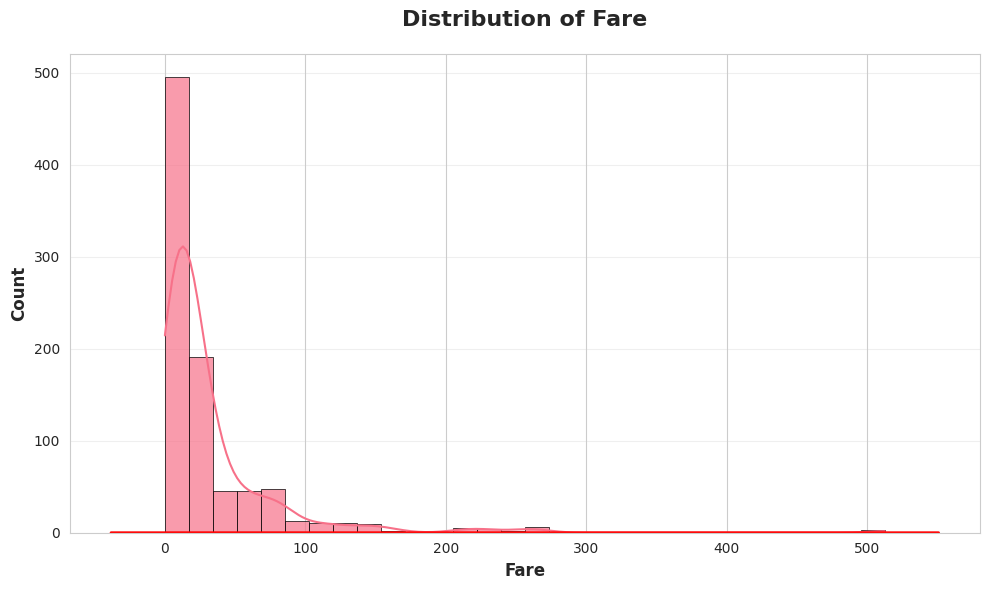

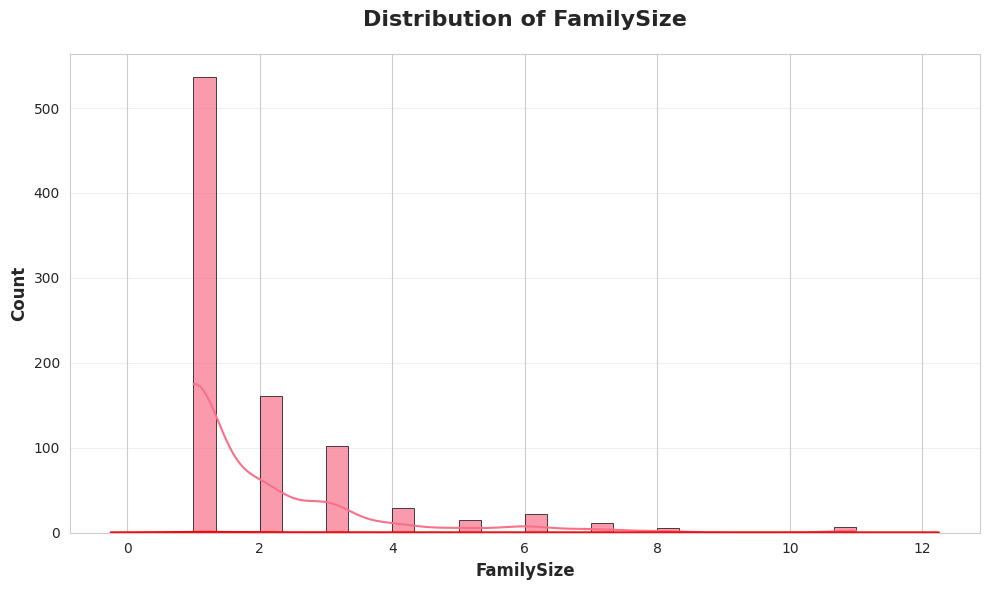

In [13]:
sns.set_style("whitegrid")
sns.set_palette("husl")

num_cols = ['Age', 'Fare', 'FamilySize']
for col in num_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, bins=30, edgecolor='black', linewidth=0.5, alpha=0.7)

    plt.title(f'Distribution of {col}', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel(col, fontsize=12, fontweight='bold')
    plt.ylabel('Count', fontsize=12, fontweight='bold')

    sns.kdeplot(df[col], color='red', linewidth=2)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

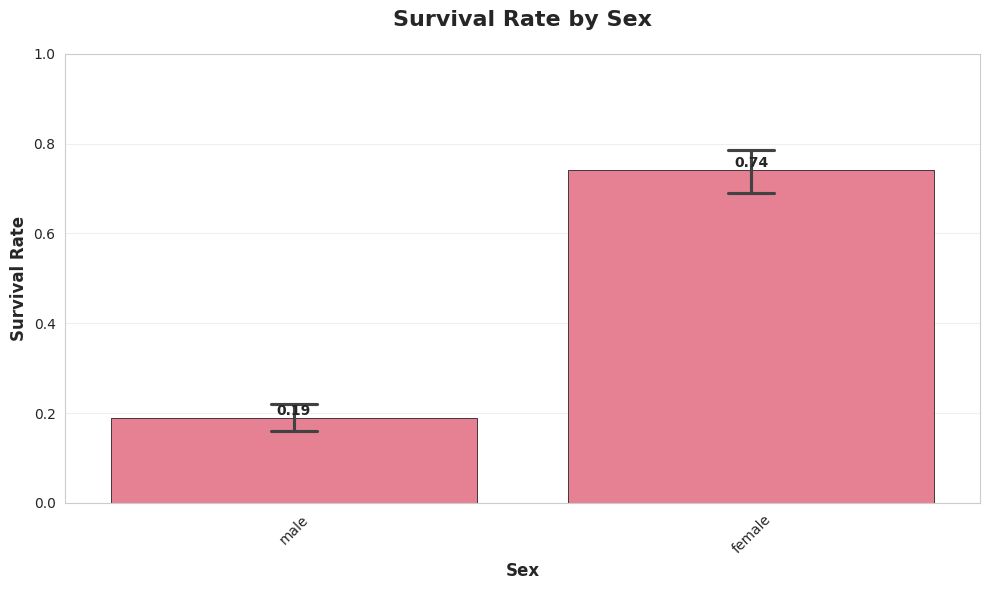

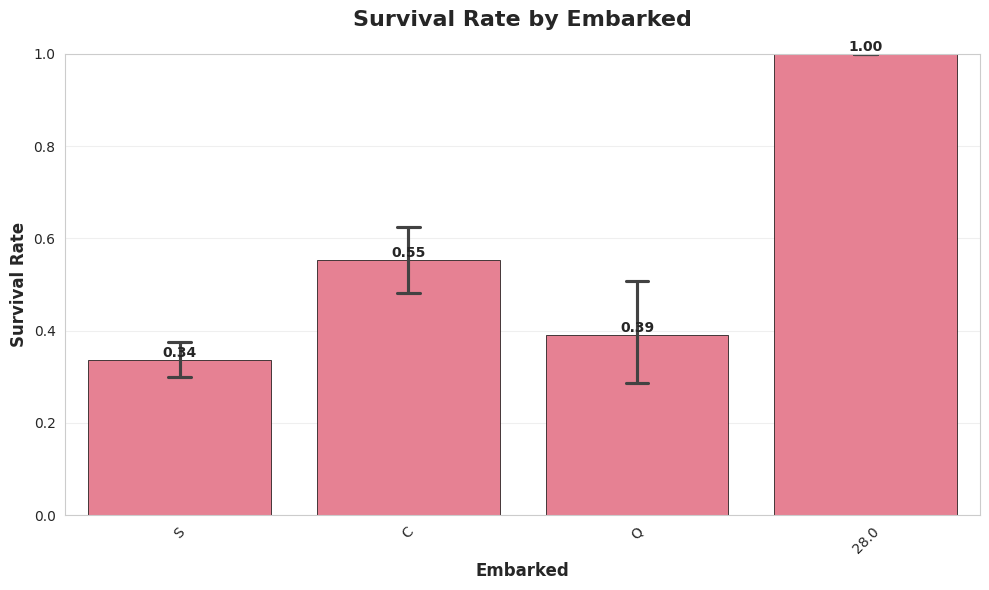

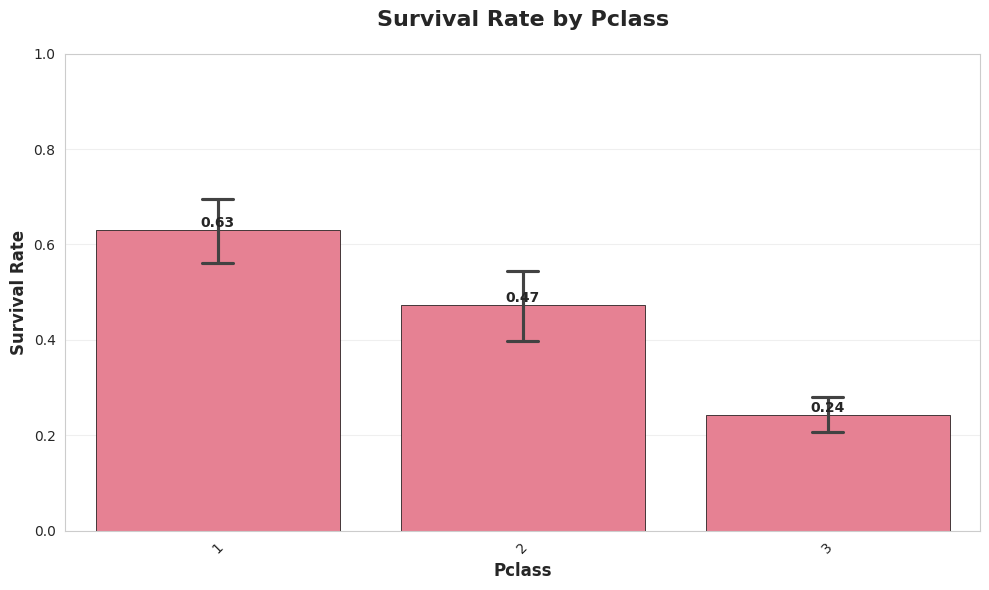

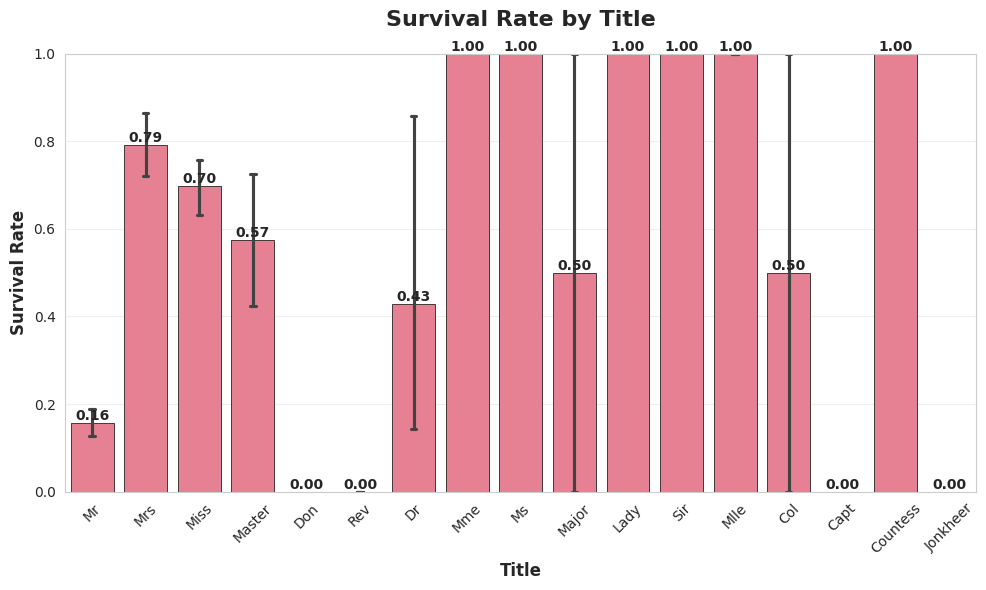

In [14]:
for col in ['Sex', 'Embarked', 'Pclass', 'Title']:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=col, y='Survived', data=df, edgecolor='black', linewidth=0.5, capsize=0.1)
    plt.title(f'Survival Rate by {col}', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel(col, fontsize=12, fontweight='bold')
    plt.ylabel('Survival Rate', fontsize=12, fontweight='bold')
    plt.xticks(rotation=45)
    for p in plt.gca().patches:
        plt.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom', fontsize=10, fontweight='bold')
    plt.grid(axis='y', alpha=0.3)
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()

In [15]:
pd.crosstab(df['Sex'], df['Pclass'], values=df['Survived'], aggfunc='mean').style.background_gradient(cmap='coolwarm')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


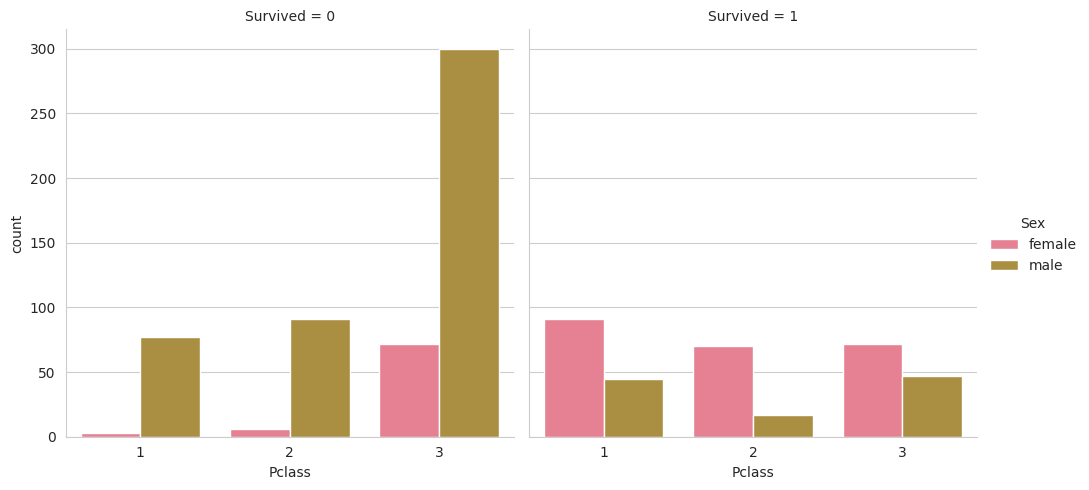

In [16]:
sns.catplot(x='Pclass', hue='Sex', col='Survived', data=df, kind='count')


In [17]:
import numpy as np

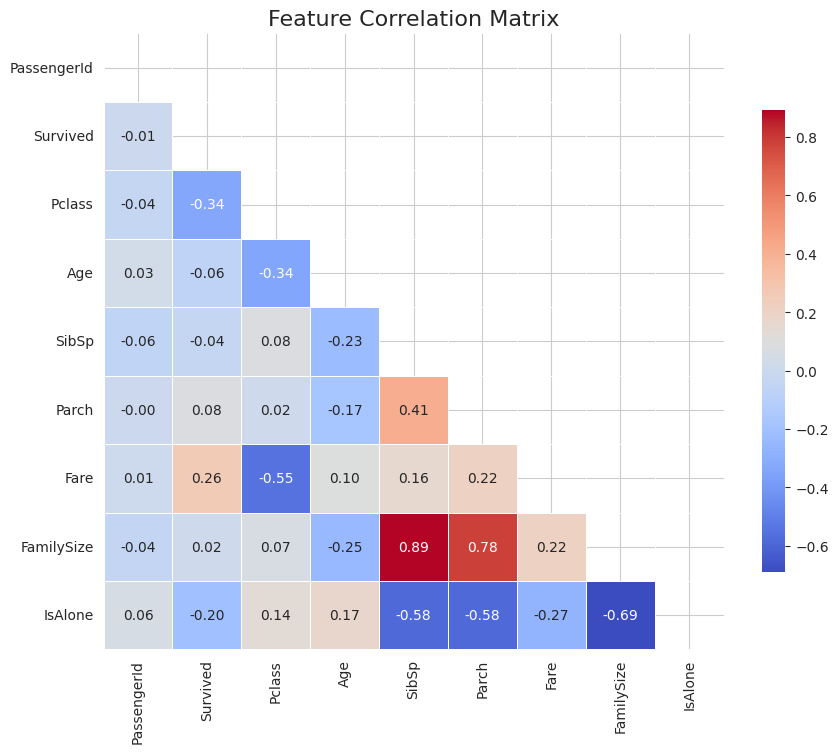

In [18]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5,
    cbar_kws={"shrink": .75}
)
plt.title('Feature Correlation Matrix', fontsize=16)
plt.show()

<Figure size 1000x1000 with 0 Axes>

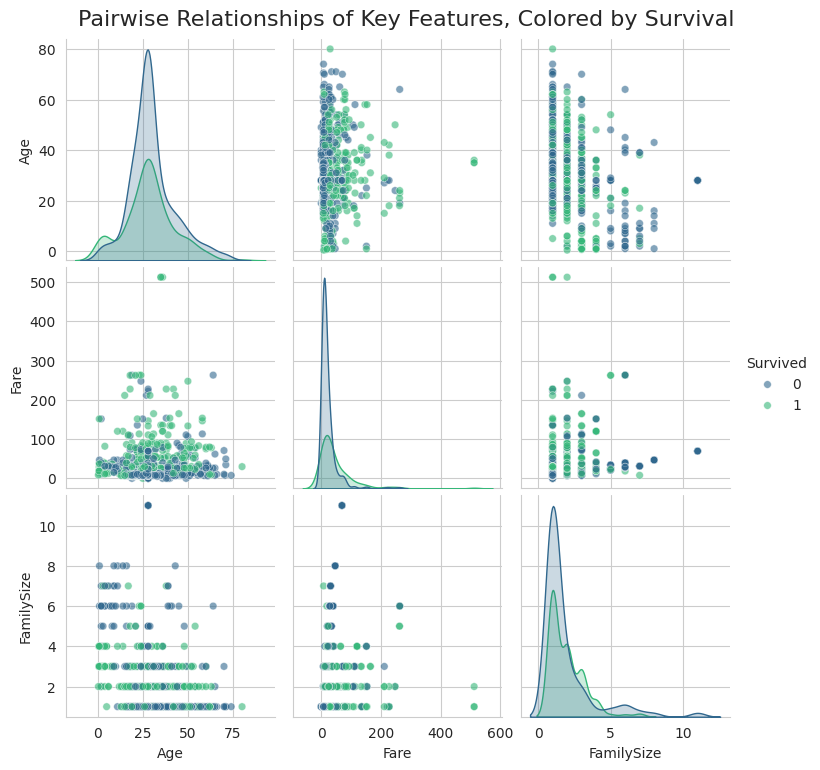

In [19]:
cols_to_plot = ['Survived', 'Age', 'Fare', 'FamilySize']
hue_var = 'Survived'
plt.figure(figsize=(10, 10))
g = sns.pairplot(
    data=df[cols_to_plot].dropna(),
    vars=[c for c in cols_to_plot if c != hue_var],
    hue=hue_var,
    diag_kind='kde',
    palette='viridis',
    plot_kws={'alpha': 0.6, 's': 30},
    height=2.5
)
g.fig.suptitle('Pairwise Relationships of Key Features, Colored by Survival',
               y=1.02, fontsize=16)
plt.show()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Title        891 non-null    object 
 12  FamilySize   891 non-null    int64  
 13  IsAlone      891 non-null    int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 97.6+ KB


In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,1,1


Encoding


In [22]:
df = pd.get_dummies(df, columns=['Sex', 'Title','Embarked'], drop_first=True)
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,FamilySize,...,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,2,...,False,False,True,False,False,False,False,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,2,...,False,False,False,True,False,False,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,...,False,False,False,False,False,False,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,2,...,False,False,False,True,False,False,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,...,False,False,True,False,False,False,False,False,False,True


In [23]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name   Age  SibSp  Parch  \
0                              Braund, Mr. Owen Harris  22.0      1      0   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                               Heikkinen, Miss. Laina  26.0      0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                             Allen, Mr. William Henry  35.0      0      0   
..                                                 ...   ...    ...    ...   
886                              Montvila, Rev. Juozas  27.0      0      0   
887                       Graham, Miss. Margaret Edith  19.0      0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  28.0      1      2   
889                              Behr, Mr. Karl Howell  26.0      0      0   
890                                Dooley, Mr. Patrick  32.0      0      0   

               Ticket     Fare  FamilySize  ...  Title_Mlle  Title_Mme  \
0           A/5 21171   7.2500           2  ...       False      False   
1            PC 17599  71.2833           2  ...       False      False   
2    STON/O2. 3101282   7.9250           1  ...       False      False   
3              113803  53.1000           2  ...       False      False   
4              373450   8.0500           1  ...       False      False   
..                ...      ...         ...  ...         ...        ...   
886            211536  13.0000           1  ...       False      False   
887            112053  30.0000           1  ...       False      False   
888        W./C. 6607  23.4500           4  ...       False      False   
889            111369  30.0000           1  ...       False      False   
890            370376   7.7500           1  ...       False      False   

     Title_Mr  Title_Mrs  Title_Ms  Title_Rev  Title_Sir  Embarked_C  \
0        True      False     False      False      False       False   
1       False       True     False      False      False        True   
2       False      False     False      False      False       False   
3       False       True     False      False      False       False   
4        True      False     False      False      False       False   
..        ...        ...       ...        ...        ...         ...   
886     False      False     False       True      False       False   
887     False      False     False      False      False       False   
888     False      False     False      False      False       False   
889      True      False     False      False      False        True   
890      True      False     False      False      False       False   

     Embarked_Q  Embarked_S  
0         False        True  
1         False       False  
2         False        True  
3         False        True  
4         False        True  
..          ...         ...  
886       False        True  
887       False        True  
888       False        True  
889       False       False  
890        True       False  

[891 rows x 31 columns]>

In [24]:
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch']
existing_columns = [col for col in columns_to_drop if col in df.columns]
df = df.drop(existing_columns, axis=1)
df.head()

,Survived,Pclass,Age,Fare,FamilySize,IsAlone,Sex_male,Title_Col,Title_Countess,Title_Don,...,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,2,0,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True
1,1,1,38.0,71.2833,2,0,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
2,1,3,26.0,7.9250,1,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,1,1,35.0,53.1000,2,0,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
4,0,3,35.0,8.0500,1,1,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        891 non-null    int64  
 1   Pclass          891 non-null    int64  
 2   Age             891 non-null    float64
 3   Fare            891 non-null    float64
 4   FamilySize      891 non-null    int64  
 5   IsAlone         891 non-null    int64  
 6   Sex_male        891 non-null    bool   
 7   Title_Col       891 non-null    bool   
 8   Title_Countess  891 non-null    bool   
 9   Title_Don       891 non-null    bool   
 10  Title_Dr        891 non-null    bool   
 11  Title_Jonkheer  891 non-null    bool   
 12  Title_Lady      891 non-null    bool   
 13  Title_Major     891 non-null    bool   
 14  Title_Master    891 non-null    bool   
 15  Title_Miss      891 non-null    bool   
 16  Title_Mlle      891 non-null    bool   
 17  Title_Mme       891 non-null    boo

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

print("\nData after normalization:")
print(df.head())


Data after normalization:
   Survived  Pclass       Age      Fare  FamilySize  IsAlone  Sex_male  \
0         0       3 -0.565736 -0.502445           2        0      True   
1         1       1  0.663861  0.786845           2        0     False   
2         1       3 -0.258337 -0.488854           1        1     False   
3         1       1  0.433312  0.420730           2        0     False   
4         0       3  0.433312 -0.486337           1        1      True   

   Title_Col  Title_Countess  Title_Don  ...  Title_Mlle  Title_Mme  Title_Mr  \
0      False           False      False  ...       False      False      True   
1      False           False      False  ...       False      False     False   
2      False           False      False  ...       False      False     False   
3      False           False      False  ...       False      False     False   
4      False           False      False  ...       False      False      True   

   Title_Mrs  Title_Ms  Title_Rev  Title_

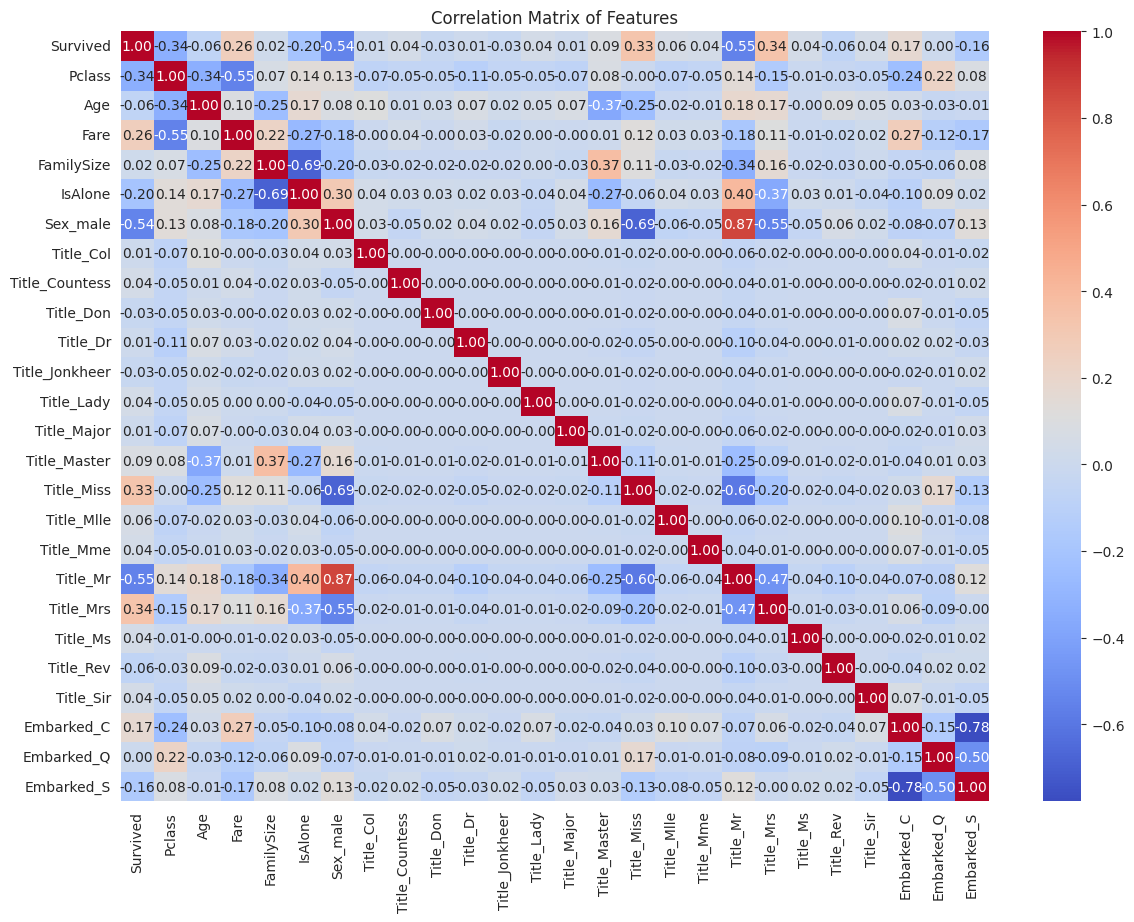

In [28]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

In [29]:
X = df.drop('Survived', axis=1)
y = df['Survived']

Data Splitting

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (712, 25)
X_test shape: (179, 25)
y_train shape: (712,)
y_test shape: (179,)


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

Model Training

--- Logistic Regression ---
Accuracy: 0.8100558659217877

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       105
           1       0.77      0.77      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



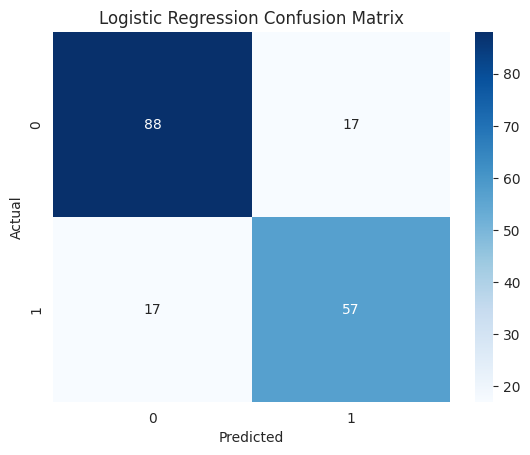

In [32]:
print("--- Logistic Regression ---")
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


--- Random Forest ---
Accuracy: 0.8324022346368715

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.86       105
           1       0.79      0.81      0.80        74

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179



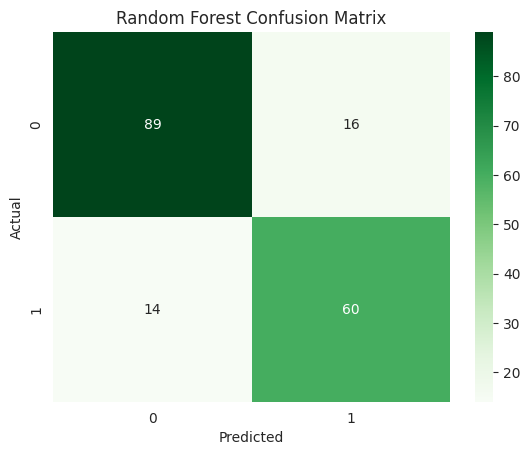

In [33]:
print("\n--- Random Forest ---")
rand_forest = RandomForestClassifier(random_state=42)
rand_forest.fit(X_train, y_train)
y_pred_rf = rand_forest.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Hyperparameter training

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(X_train, y_train)
print("\nBest parameters found:", grid_search.best_params_)

best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best parameters found: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [36]:
print("--- Performance Comparison ---")
print("\nOriginal Random Forest Report:\n", classification_report(y_test, y_pred_rf))
print("\nTuned Random Forest Report:\n", classification_report(y_test, y_pred_best_rf))

print("Original RF Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Tuned RF Accuracy:", accuracy_score(y_test, y_pred_best_rf))

--- Performance Comparison ---

Original Random Forest Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.86       105
           1       0.79      0.81      0.80        74

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179


Tuned Random Forest Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86       105
           1       0.82      0.76      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

Original RF Accuracy: 0.8324022346368715
Tuned RF Accuracy: 0.8324022346368715


Saving Model

In [37]:
import pickle

filename = 'titanic_survival_model.pkl'
pickle.dump(best_rf_model, open(filename, 'wb'))

print(f"Model saved as {filename}")

Model saved as titanic_survival_model.pkl


Deployment

In [ ]:
!pip install streamlit

In [39]:
%%writefile app.py
import streamlit as st
import pickle
import pandas as pd
import numpy as np

model = pickle.load(open('titanic_survival_model.pkl', 'rb'))

st.title('Titanic Survival Predictor')
st.header('Enter Passenger Information:')

pclass = st.selectbox('Pclass', [1, 2, 3])
sex = st.selectbox('Sex', ['male', 'female'])
age = st.slider('Age', 0.1, 80.0, 30.0)
sibsp = st.slider('SibSp', 0, 8, 0)
parch = st.slider('Parch', 0, 6, 0)
fare = st.slider('Fare', 0.0, 500.0, 50.0)
embarked = st.selectbox('Embarked', ['C', 'Q', 'S'])

family_size = sibsp + parch + 1
is_alone = 1 if family_size == 1 else 0

input_data = {
    'Pclass': pclass,
    'Age': age,
    'Fare': fare,
    'FamilySize': family_size,
    'IsAlone': is_alone,
    'Sex_male': 1 if sex == 'male' else 0,
    'Title_Col': 0,
    'Title_Countess': 0,
    'Title_Don': 0,
    'Title_Dr': 0,
    'Title_Jonkheer': 0,
    'Title_Lady': 0,
    'Title_Major': 0,
    'Title_Master': 0,
    'Title_Miss': 0,
    'Title_Mlle': 0,
    'Title_Mme': 0,
    'Title_Mr': 1 if sex == 'male' else 0,
    'Title_Mrs': 1 if sex == 'female' else 0,
    'Title_Ms': 0,
    'Title_Rev': 0,
    'Title_Sir': 0,
    'Embarked_C': 1 if embarked == 'C' else 0,
    'Embarked_Q': 1 if embarked == 'Q' else 0,
    'Embarked_S': 1 if embarked == 'S' else 0,
}

input_df = pd.DataFrame([input_data])

train_columns = ['Pclass', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_male',
       'Title_Col', 'Title_Countess', 'Title_Don', 'Title_Dr', 'Title_Jonkheer',
       'Title_Lady', 'Title_Major', 'Title_Master', 'Title_Miss', 'Title_Mlle',
       'Title_Mme', 'Title_Mr', 'Title_Mrs', 'Title_Ms', 'Title_Rev',
       'Title_Sir', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

input_df = input_df[train_columns]

scaler_age_mean = 29.69911764705882
scaler_age_std = 13.002015248063374
scaler_fare_mean = 32.2042079685746
scaler_fare_std = 49.69342859445439

input_df['Age'] = (input_df['Age'] - scaler_age_mean) / scaler_age_std
input_df['Fare'] = (input_df['Fare'] - scaler_fare_mean) / scaler_fare_std

if st.button('Predict Survival'):
    prediction = model.predict(input_df)
    prediction_proba = model.predict_proba(input_df)[:, 1]

    st.subheader('Prediction:')
    if prediction[0] == 1:
        st.success(f'Survived! (Probability: {prediction_proba[0]:.2f})')
    else:
        st.error(f'Did not survive (Probability: {prediction_proba[0]:.2f})')


Writing app.py
